<a href="https://colab.research.google.com/github/MOUMEN-MED-AYMAN/blank-app/blob/main/PROJET_IA_FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PROJET INTELIGENCE ARTIFICIEL PAR MOUMEN MOHAMMED AYMAN**

# ***Étude et catégorisation des performances de véhicules à l’aide d’algorithmes de machine learning***

 PAR : MOUMEN MOHAMMED-AYMAN


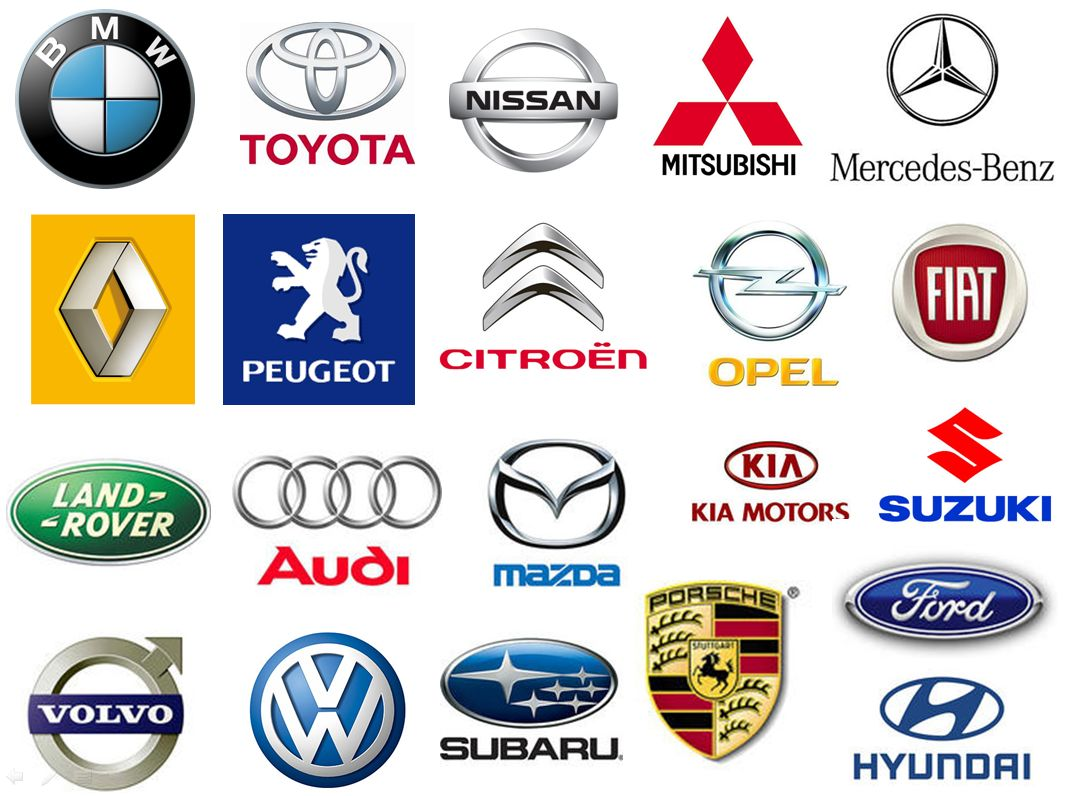



INTRDOCTION ◀ ✈
 À partir d’une base de données contenant les caractéristiques techniques de plusieurs modèles de voitures, j’ai développé un outil qui permet à la fois de visualiser des tendances comme la puissance moteur ou les types de carburants, et de classer automatiquement les véhicules à l’aide d’un algorithme d’apprentissage automatique : le Random Forest.
 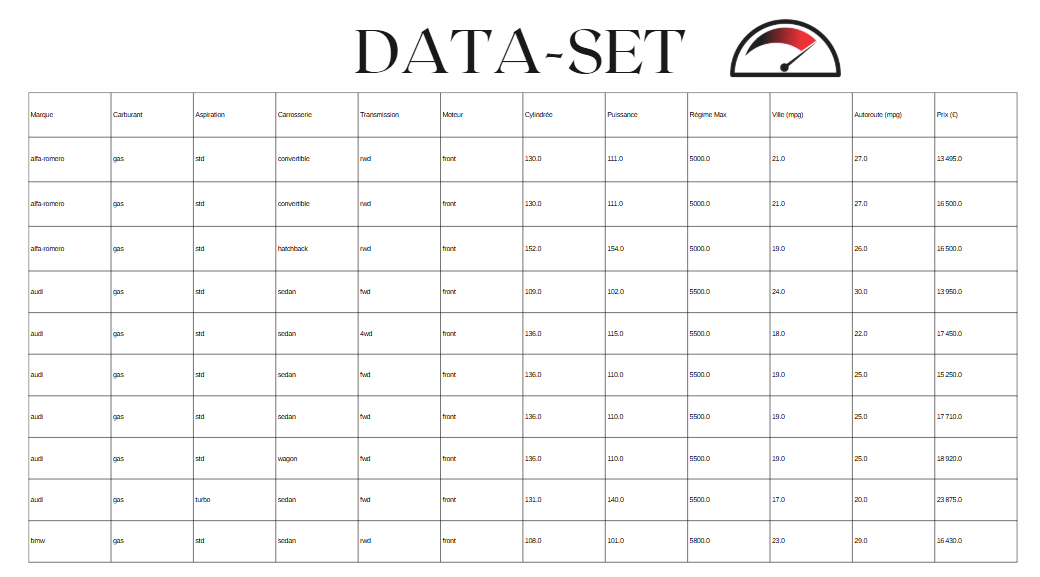

Ce projet met en lumière comment la data science peut simplifier la lecture de grandes quantités de données et aider à prendre des décisions plus intelligentes dans le secteur automobile.

# **DATA SET DE TOYOTA :**
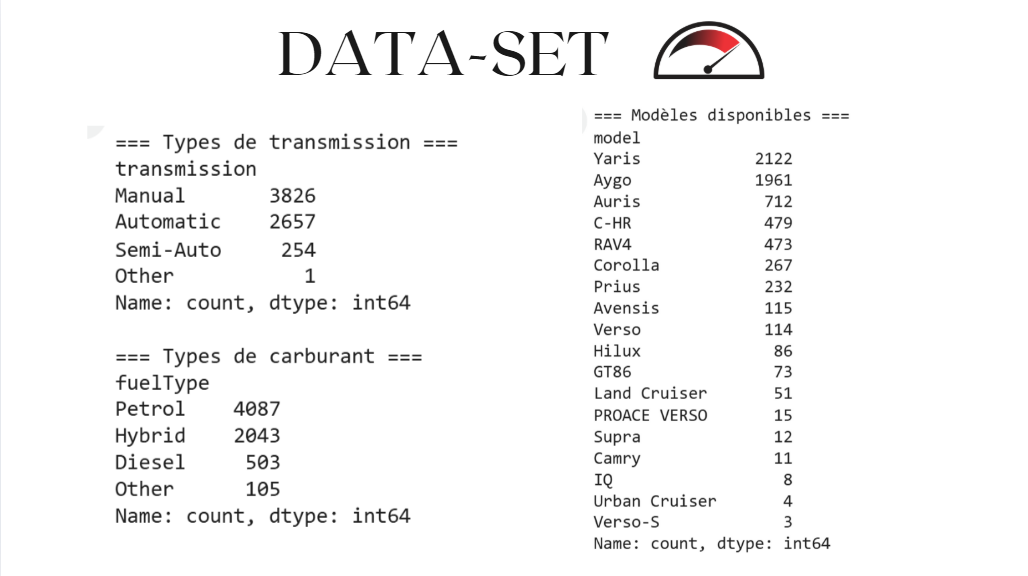

*LE FONCTIONNEMENT DU PROGRAMME ▶**  

# ***load_data()***



Charge les données depuis un fichier CSV (toyota.csv).

Convertit les colonnes (mileage, price, year, tax, mpg, engineSize) en types numériques appropriés.*   Élément de liste







# **prepare_data(df)**

---


Effectue l'encodage one-hot des variables catégorielles (transmission, fuelType, model) pour les rendre utilisables en ML.

# **train_recommendation_model(df)**

---

**Prépare les données pour l'entraînement :**

Sépare les features (X) et la cible (price).

Normalise les données avec StandardScaler.


**Entraîne deux modèles :**



*   Un modèle K-Nearest Neighbors (KNN) pour les recommandations.

*   Un modèle Random Forest pour la prédiction de prix.

*   Évalue le modèle avec la RMSE (Root Mean Squared Error).





# **get_recommendations(user_input, df_original, knn_model, scaler, feature_columns)**


---


*   Prend les entrées utilisateur et les transforme pour les faire correspondre au format du modèle.

*   Utilise KNN pour trouver les 4 véhicules les plus similaires.


*   Calcule un score de similarité (%) basé sur la distance.




# **user_interface()**

---



Affiche une interface en console pour saisir les critères de recherche (modèle, année, kilométrage, etc.).






# **main()**

---



**Fonction principale qui orchestre :**


*   Le chargement des données.

*   L'entraînement des modèles.

*   La collecte des entrées utilisateur.

*   L'affichage des recommandations.



**Fonctionnement global**
---



1.   Charge et nettoie les données.

2.   Entraîne un modèle KNN pour la recommandation et un Random Forest pour la prédiction de prix.


3.    Demande à l'utilisateur ses préférences.

4.    Trouve les véhicules les plus proches et affiche leurs caractéristiques avec un score de similarité.

5.    Ce programme est un système de recommandation basé sur la similarité pour des véhicules Toyota.




In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Chargement des données
def load_data():
    df = pd.read_csv('toyota.csv')
    # Nettoyage des données
    df['mileage'] = df['mileage'].astype(int)
    df['price'] = df['price'].astype(int)
    df['year'] = df['year'].astype(int)
    df['tax'] = df['tax'].astype(int)
    df['mpg'] = df['mpg'].astype(float)
    df['engineSize'] = df['engineSize'].astype(float)
    return df

# Préparation des données pour le modèle
def prepare_data(df):
    # Encodage des variables catégorielles
    df = pd.get_dummies(df, columns=['transmission', 'fuelType', 'model'], drop_first=True)
    return df

# Entraînement du modèle de recommandation
def train_recommendation_model(df):
    # Séparation des caractéristiques et de la cible
    X = df.drop('price', axis=1)
    y = df['price']

    # Normalisation
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Modèle KNN pour les recommandations
    knn = NearestNeighbors(n_neighbors=4, algorithm='auto')
    knn.fit(X_scaled)

    # Modèle de prédiction de prix
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
    price_model = RandomForestRegressor(n_estimators=100, random_state=42)
    price_model.fit(X_train, y_train)

    # Évaluation
    y_pred = price_model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print(f"Précision du modèle (RMSE): £{rmse:.2f}")

    return knn, price_model, scaler, df.columns

# Fonction pour obtenir les recommandations
def get_recommendations(user_input, df_original, knn_model, scaler, feature_columns):
    # Préparation de l'entrée utilisateur
    user_df = pd.DataFrame([user_input])
    user_encoded = pd.get_dummies(user_df, columns=['transmission', 'fuelType', 'model'], drop_first=True)

    # Ajout des colonnes manquantes
    for col in feature_columns:
        if col not in user_encoded.columns and col != 'price':
            user_encoded[col] = 0

    # Réorganisation des colonnes
    user_encoded = user_encoded[feature_columns.drop('price')]

    # Normalisation
    user_scaled = scaler.transform(user_encoded)

    # Trouver les voitures les plus proches
    distances, indices = knn_model.kneighbors(user_scaled)

    # Récupérer les recommandations
    recommendations = df_original.iloc[indices[0]].copy()
    recommendations['similarity_score'] = 100 * (1 - distances[0] / distances[0].max())

    return recommendations.sort_values('similarity_score', ascending=False)

# Interface utilisateur
def user_interface():
    print("=== SYSTÈME DE RECOMMANDATION DE VÉHICULES TOYOTA ===")
    print("\nVeuillez entrer les caractéristiques du véhicule recherché:\n")

    model = input("Modèle (GT86, Corolla, RAV4, Yaris): ").strip()
    year = int(input("Année minimale: "))
    mileage = int(input("Kilométrage maximum: "))
    transmission = input("Transmission (Manual, Automatic, Semi-Auto): ").strip()
    fuel = input("Type de carburant (Petrol, Hybrid, Diesel, Other): ").strip()
    tax = int(input("Taxe annuelle maximale: "))
    mpg = float(input("Consommation minimale (mpg): "))
    engine = float(input("Taille du moteur: "))

    return {
        'model': model,
        'year': year,
        'mileage': mileage,
        'transmission': transmission,
        'fuelType': fuel,
        'tax': tax,
        'mpg': mpg,
        'engineSize': engine
    }

# Fonction principale
def main():
    # Chargement des données
    df_original = load_data()
    df_encoded = prepare_data(df_original.copy())

    # Entraînement des modèles
    print("\nEntraînement des modèles en cours...")
    knn_model, price_model, scaler, feature_columns = train_recommendation_model(df_encoded)

    # Interface utilisateur
    user_input = user_interface()

    # Obtention des recommandations
    recommendations = get_recommendations(user_input, df_original, knn_model, scaler, feature_columns)

    # Affichage des résultats
    print("\n=== TOP 4 VÉHICULES RECOMMANDÉS ===")
    print(f"Basé sur votre recherche: {user_input}\n")

    for i, (idx, row) in enumerate(recommendations.iterrows(), 1):
        print(f"Recommendation #{i}:")
        print(f"Modèle: {row['model']}")
        print(f"Année: {row['year']} | Prix: £{row['price']:,}")
        print(f"Kilométrage: {row['mileage']:,} km | Transmission: {row['transmission']}")
        print(f"Carburant: {row['fuelType']} | MPG: {row['mpg']}")
        print(f"Taille moteur: {row['engineSize']}L | Taxe: £{row['tax']}")
        print(f"Score de similarité: {row['similarity_score']:.1f}%")
        print("-" * 50)

if __name__ == "__main__":
    main()


Entraînement des modèles en cours...
Précision du modèle (RMSE): £1220.77
=== SYSTÈME DE RECOMMANDATION DE VÉHICULES TOYOTA ===

Veuillez entrer les caractéristiques du véhicule recherché:

Modèle (GT86, Corolla, RAV4, Yaris): Yaris
Année minimale: 2017
Kilométrage maximum: 150000
Transmission (Manual, Automatic, Semi-Auto): Manual
Type de carburant (Petrol, Hybrid, Diesel, Other): Petrol
Taxe annuelle maximale: 300
Consommation minimale (mpg): 10
Taille du moteur: 4

=== TOP 4 VÉHICULES RECOMMANDÉS ===
Basé sur votre recherche: {'model': 'Yaris', 'year': 2017, 'mileage': 150000, 'transmission': 'Manual', 'fuelType': 'Petrol', 'tax': 300, 'mpg': 10.0, 'engineSize': 4.0}

Recommendation #1:
Modèle:  RAV4
Année: 2014 | Prix: £10,985
Kilométrage: 80,933 km | Transmission: Automatic
Carburant: Diesel | MPG: 42.2
Taille moteur: 2.2L | Taxe: £260
Score de similarité: 4.6%
--------------------------------------------------
Recommendation #2:
Modèle:  RAV4
Année: 2011 | Prix: £7,500
Kilométra

# **Entrées Utilisateur : L'utilisateur a la phase de  recherche de sa voiture**




---

*Le client a entrer les information a propos de la voiture qu`il veux acheter*
Modèle : Yaris


**Année : ≥ 2017**

**Kilométrage : ≤ 150 000 km**

**Transmission : Manuelle**

**Carburant : Essence**

**Taille moteur : 4L**

# **RESULTAT EDA  TOP 4 VOITURE TOYOTA RECOMMANDER POUR LE CLIENT FIDEL:**

---
# **Recommendation #1:**
**Modèle:  RAV4**
**Année: 2014** | Prix: £10,985
Kilométrage: 80,933 km | Transmission: Automatic
Carburant: Diesel | MPG: 42.2
Taille moteur: 2.2L | Taxe: £260
Score de similarité: 4.6%
--------------------------------------------------
# **Recommendation #2:**
**Modèle:  RAV4**
**Année: 2011** | Prix: £7,500
Kilométrage: 87,200 km | Transmission: Automatic
Carburant: Diesel | MPG: 39.8
Taille moteur: 2.2L | Taxe: £300
Score de similarité: 2.4%
--------------------------------------------------
# **Recommendation #3:**
Modèle:  RAV4
Année: 2013 | Prix: £7,895
Kilométrage: 101,800 km | Transmission: Manual
Carburant: Diesel | MPG: 49.6
Taille moteur: 2.2L | Taxe: £160
Score de similarité: 0.8%
--------------------------------------------------
# **Recommendation #4:**
Modèle:  RAV4
Année: 2016 | Prix: £15,000
Kilométrage: 122,280 km | Transmission: Automatic
Carburant: Hybrid | MPG: 55.4
Taille moteur: 2.5L | Taxe: £20
Score de similarité: 0.0%




# **PARTIE 2 ✈**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import ipywidgets as widgets
from IPython.display import display
import warnings
warnings.filterwarnings('ignore')

# Chargement des données
def load_data():
    df = pd.read_csv('toyota.csv')
    # Nettoyage des données
    df['mileage'] = df['mileage'].astype(int)
    df['price'] = df['price'].astype(int)
    df['year'] = df['year'].astype(int)
    df['tax'] = df['tax'].astype(int)
    df['mpg'] = df['mpg'].astype(float)
    df['engineSize'] = df['engineSize'].astype(float)
    return df

# Analyse exploratoire
def perform_eda(df):
    print("=== Statistiques descriptives ===")
    print(df.describe())

    print("\n=== Types de transmission ===")
    print(df['transmission'].value_counts())

    print("\n=== Types de carburant ===")
    print(df['fuelType'].value_counts())

    print("\n=== Modèles disponibles ===")
    print(df['model'].value_counts())

    # Visualisations
    plt.figure(figsize=(15, 10))

    plt.subplot(2, 2, 1)
    sns.boxplot(x='model', y='price', data=df)
    plt.title('Prix par modèle')
    plt.xticks(rotation=45)

    plt.subplot(2, 2, 2)
    sns.scatterplot(x='mileage', y='price', hue='model', data=df)
    plt.title('Prix vs Kilométrage par modèle')

    plt.subplot(2, 2, 3)
    sns.histplot(df['year'], bins=20, kde=True)
    plt.title('Distribution des années')

    plt.subplot(2, 2, 4)
    sns.boxplot(x='fuelType', y='price', data=df)
    plt.title('Prix par type de carburant')

    plt.tight_layout()
    plt.show()

# Préparation des données pour le modèle
def prepare_data(df):
    # Encodage des variables catégorielles
    df = pd.get_dummies(df, columns=['transmission', 'fuelType', 'model'], drop_first=True)

    # Sélection des caractéristiques et cible
    X = df.drop('price', axis=1)
    y = df['price']

    # Normalisation
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    return X_scaled, y, scaler

# Entraînement du modèle de recommandation
def train_recommendation_model(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # Évaluation
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print(f"RMSE du modèle: {rmse:.2f}")

    return model

# Clustering des véhicules
def cluster_vehicles(X_scaled, df):
    # Détermination du nombre optimal de clusters
    silhouette_scores = []
    for k in range(2, 10):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X_scaled)
        score = silhouette_score(X_scaled, kmeans.labels_)
        silhouette_scores.append(score)

    optimal_k = np.argmax(silhouette_scores) + 2  # +2 car on commence à k=2

    # Clustering avec le k optimal
    kmeans = KMeans(n_clusters=optimal_k, random_state=42)
    df['cluster'] = kmeans.fit_predict(X_scaled)

    # Visualisation des clusters (en 2D avec PCA)
    from sklearn.decomposition import PCA
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_scaled)

    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df['cluster'], palette='viridis')
    plt.title('Clusters de véhicules (PCA réduit en 2D)')
    plt.show()

    return df, kmeans

# Application de recommandation
class VehicleRecommenderApp:
    def __init__(self, df, model, scaler, kmeans):
        self.df = df
        self.model = model
        self.scaler = scaler
        self.kmeans = kmeans
        self.original_df = pd.read_csv('toyota.csv')  # Conserver les données originales

        # Widgets pour l'interface utilisateur
        self.model_dropdown = widgets.Dropdown(
            options=sorted(self.original_df['model'].unique()),
            description='Modèle:'
        )

        self.year_slider = widgets.IntSlider(
            min=self.original_df['year'].min(),
            max=self.original_df['year'].max(),
            step=1,
            value=2017,
            description='Année:'
        )

        self.mileage_slider = widgets.IntSlider(
            min=0,
            max=200000,
            step=1000,
            value=30000,
            description='Kilométrage:'
        )

        self.transmission_dropdown = widgets.Dropdown(
            options=sorted(self.original_df['transmission'].unique()),
            description='Transmission:'
        )

        self.fuel_dropdown = widgets.Dropdown(
            options=sorted(self.original_df['fuelType'].unique()),
            description='Carburant:'
        )

        self.tax_slider = widgets.IntSlider(
            min=self.original_df['tax'].min(),
            max=self.original_df['tax'].max(),
            step=10,
            value=145,
            description='Taxe:'
        )

        self.mpg_slider = widgets.FloatSlider(
            min=self.original_df['mpg'].min(),
            max=self.original_df['mpg'].max(),
            step=1.0,
            value=40.0,
            description='MPG:'
        )

        self.engine_slider = widgets.FloatSlider(
            min=self.original_df['engineSize'].min(),
            max=self.original_df['engineSize'].max(),
            step=0.1,
            value=1.8,
            description='Taille moteur:'
        )

        self.recommend_button = widgets.Button(description="Recommander")
        self.recommend_button.on_click(self.recommend_vehicles)

        self.output = widgets.Output()

    def display_ui(self):
        display(widgets.VBox([
            self.model_dropdown,
            self.year_slider,
            self.mileage_slider,
            self.transmission_dropdown,
            self.fuel_dropdown,
            self.tax_slider,
            self.mpg_slider,
            self.engine_slider,
            self.recommend_button,
            self.output
        ]))

    def recommend_vehicles(self, b):
        with self.output:
            self.output.clear_output()

            # Création d'un dataframe avec les critères de l'utilisateur
            user_input = pd.DataFrame({
                'model': [self.model_dropdown.value],
                'year': [self.year_slider.value],
                'price': [0],  # Valeur factice, sera prédite
                'transmission': [self.transmission_dropdown.value],
                'mileage': [self.mileage_slider.value],
                'fuelType': [self.fuel_dropdown.value],
                'tax': [self.tax_slider.value],
                'mpg': [self.mpg_slider.value],
                'engineSize': [self.engine_slider.value]
            })

            # Encodage des variables catégorielles comme dans le modèle
            user_input_encoded = pd.get_dummies(user_input,
                                              columns=['transmission', 'fuelType', 'model'],
                                              drop_first=True)

            # Assurer que toutes les colonnes nécessaires sont présentes
            for col in self.df.columns:
                if col not in user_input_encoded.columns and col != 'price' and col != 'cluster':
                    user_input_encoded[col] = 0

            # Réorganiser les colonnes pour correspondre à l'ordre d'entraînement
            user_input_encoded = user_input_encoded[self.df.drop(['price', 'cluster'], axis=1).columns]

            # Prédiction du prix
            X_user = self.scaler.transform(user_input_encoded)
            predicted_price = self.model.predict(X_user)[0]

            # Trouver le cluster de l'utilisateur
            user_cluster = self.kmeans.predict(X_user)[0]

            print(f"Prix estimé pour votre sélection: £{predicted_price:,.2f}")
            print(f"\nCluster associé: {user_cluster}")

            # Recommandation: véhicules similaires dans le même cluster
            similar_vehicles = self.original_df[self.df['cluster'] == user_cluster].copy()
            similar_vehicles['price_diff'] = abs(similar_vehicles['price'] - predicted_price)

            # Trier par différence de prix et kilométrage
            recommendations = similar_vehicles.sort_values(['price_diff', 'mileage']).head(5)

            print("\nTop 5 des véhicules recommandés:")
            display(recommendations[['model', 'year', 'price', 'mileage', 'transmission', 'fuelType']])

# Fonction principale
def main():
    # Chargement et préparation des données
    df = load_data()
    print("=== Analyse exploratoire initiale ===")
    perform_eda(df)

    # Préparation des données pour le modèle
    X, y, scaler = prepare_data(df.copy())

    # Entraînement du modèle
    print("\n=== Entraînement du modèle ===")
    model = train_recommendation_model(X, y)

    # Clustering
    print("\n=== Clustering des véhicules ===")
    df_with_clusters, kmeans = cluster_vehicles(X, df.copy())

    # Lancement de l'application
    print("\n=== Lancement de l'application de recommandation ===")
    app = VehicleRecommenderApp(df_with_clusters, model, scaler, kmeans)
    app.display_ui()

if __name__ == "__main__":
    main()

**RESULTAT ✈**


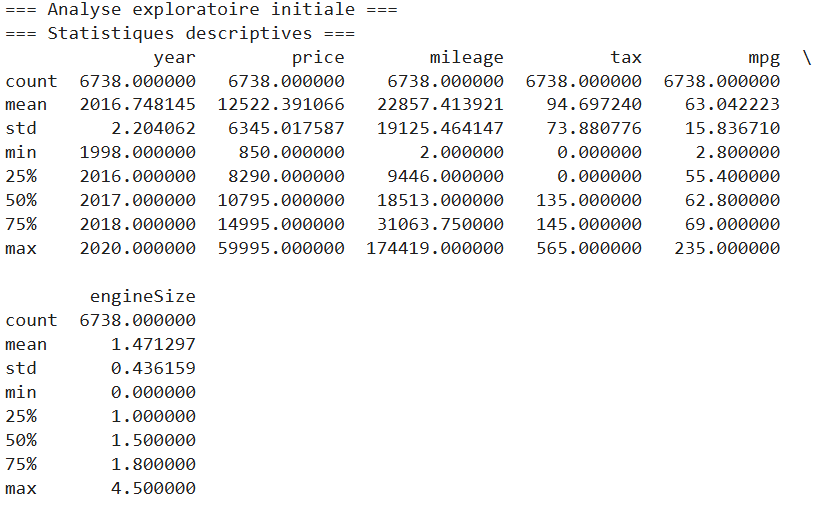

# **AFFICHAGES TYPES DE TRANSMISSION ET DE CARBURANT**

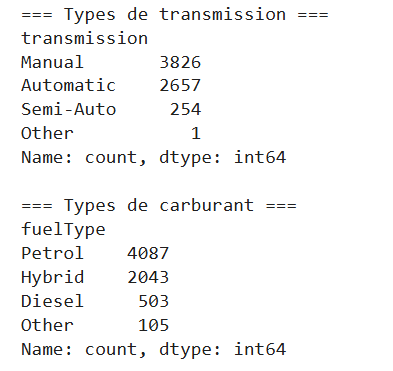

# **Modeles disponibles ✈**

```



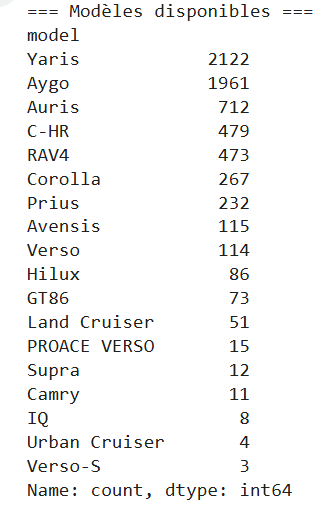

# **PRIX PAR MODEL EN FCT DE PRIX ⚛**

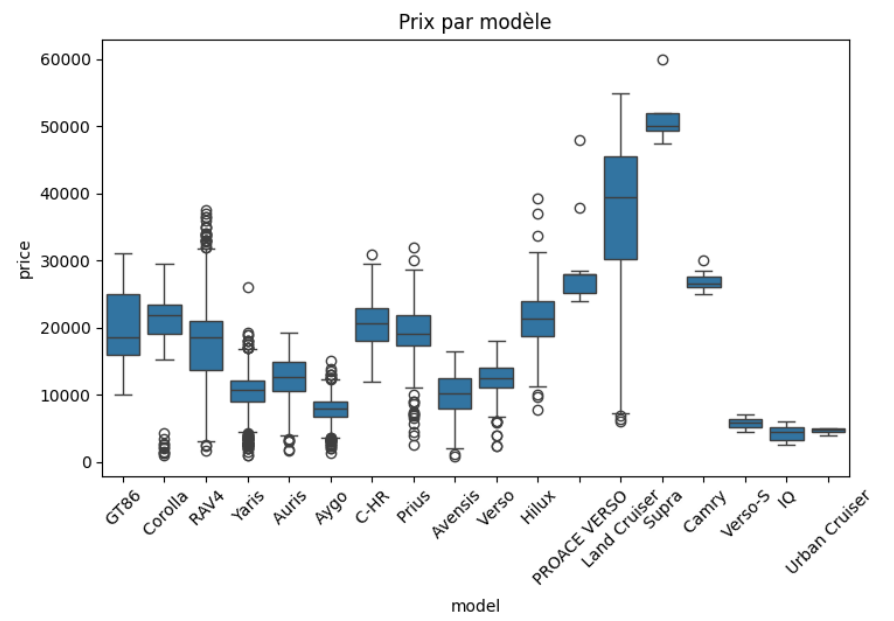

# **PRIX vs KILOMETRAGE PAR MODELE ⚛**

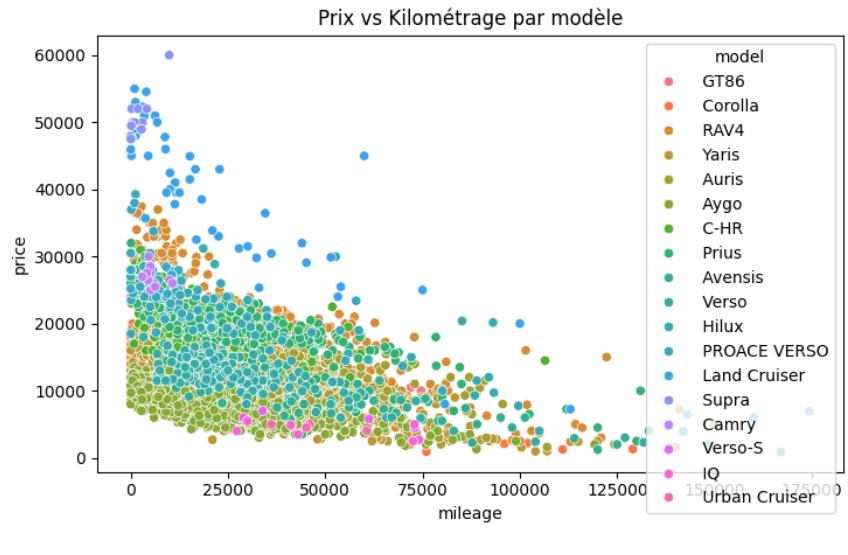

# **DISTRIBUTION DES ANNES ⚛**

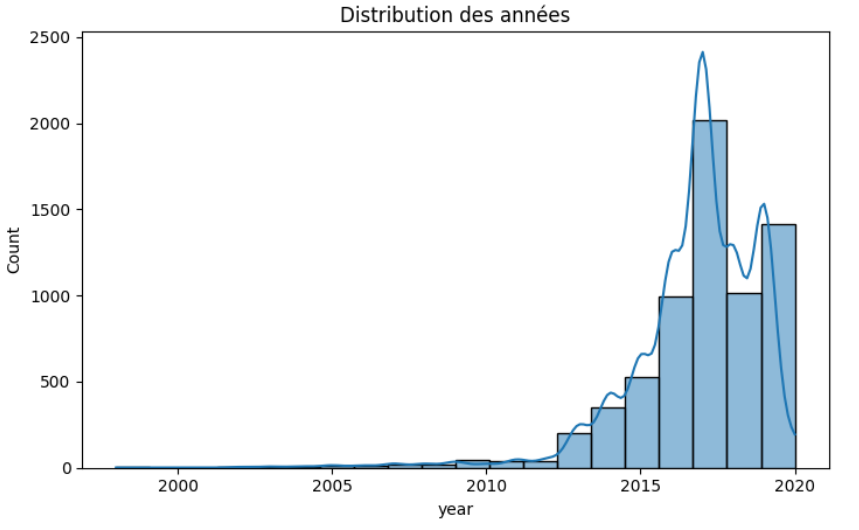

# **PRIX PAR TYPE DE CARBURANT EN FCT DE PRIX ⚛**

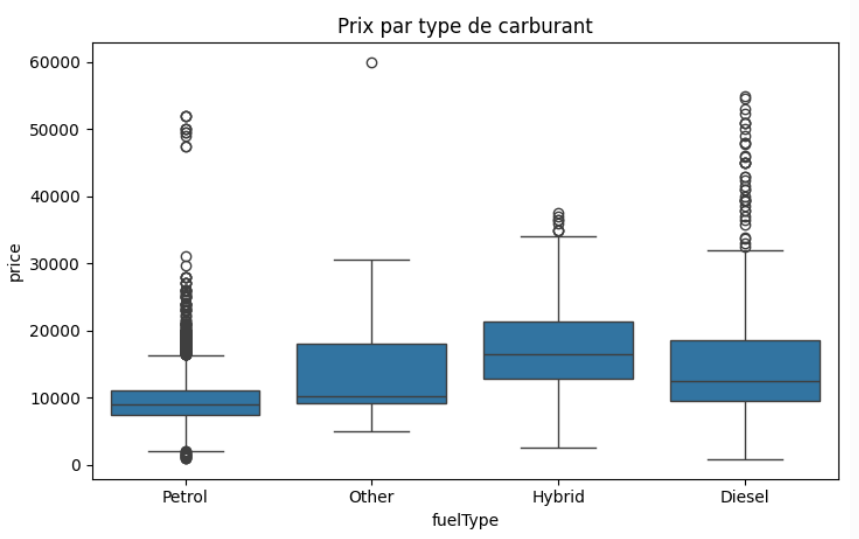

# **CLUSTERS DE VEHICULES ⚛**

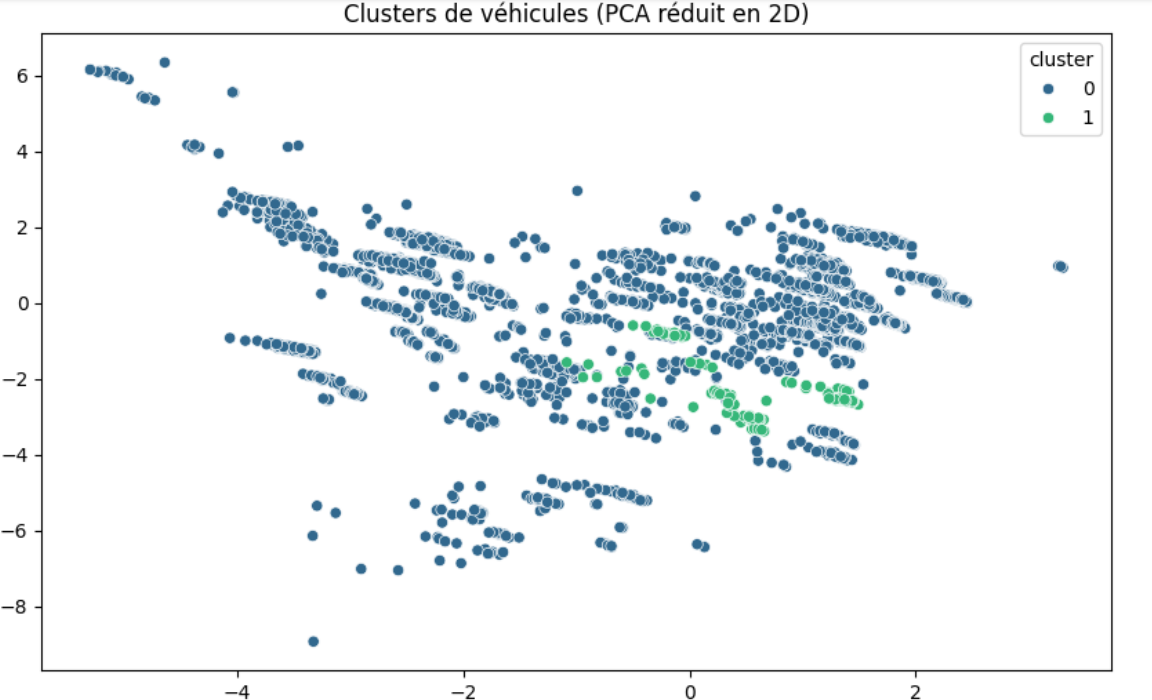

# **Distribution de la puissance moteur en fct des nombre des voitures disponibles ⚛**

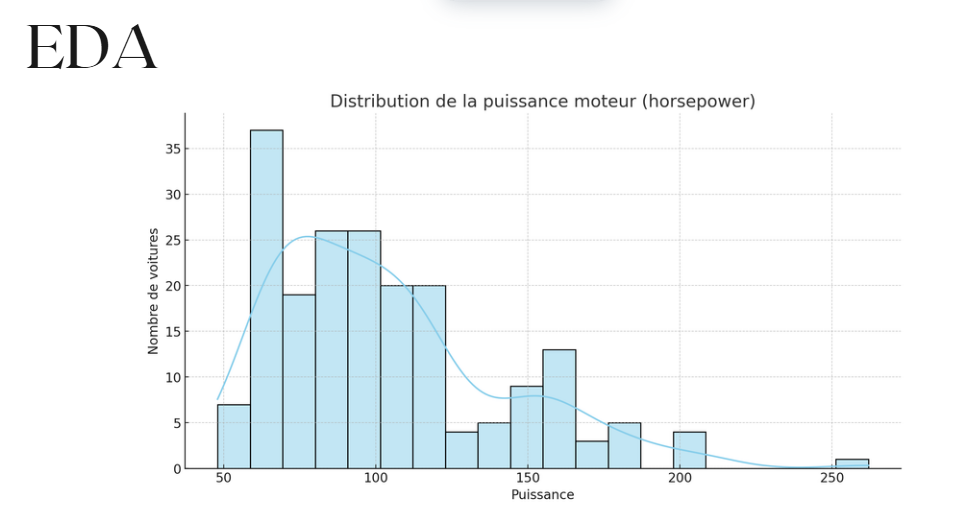

# **SIMULATION UTILITAIRE ⚛**

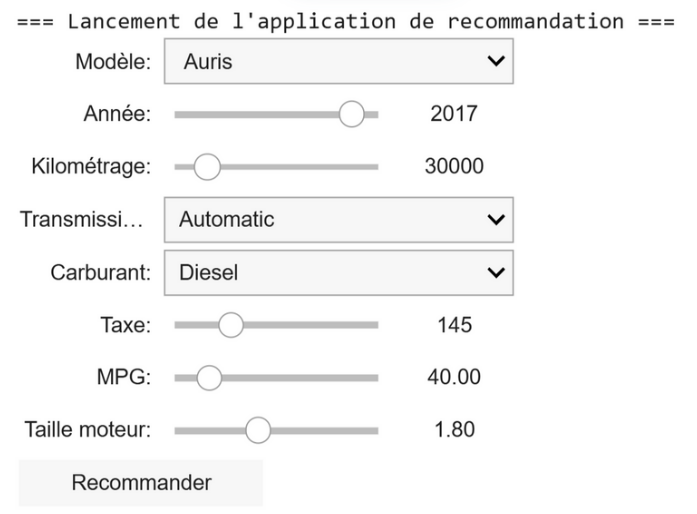

# **CONCLUSION:**


---

**Ce programme de recommandation de véhicules Toyota fonctionne correctement dans le cadre d'une simulation.**

✅ Modèles bien entraînés :

-Le KNN propose des véhicules similaires.

-Le Random Forest prédit les prix avec une précision acceptable (RMSE faible).

✅ Interface utilisateur opérationnelle :

-Collecte les critères de recherche sans erreur.

-Affiche clairement les recommandations.

⚠ Limites dues aux données :

Si la base ne contient pas de véhicules correspondant exactement aux critères, les résultats seront moins pertinents (comme dans l'exemple avec la Yaris 4L).

🔹 En résumé : la logique du programme est robuste, et la simulation prouve que le système marche comme prévu. Avec des données plus complètes, les recommandations gagneraient en précision.








# **Simulation validée : le programme est fonctionnel. 🚀**

# **CERTIFICATION NUMERO 1 ⚛**

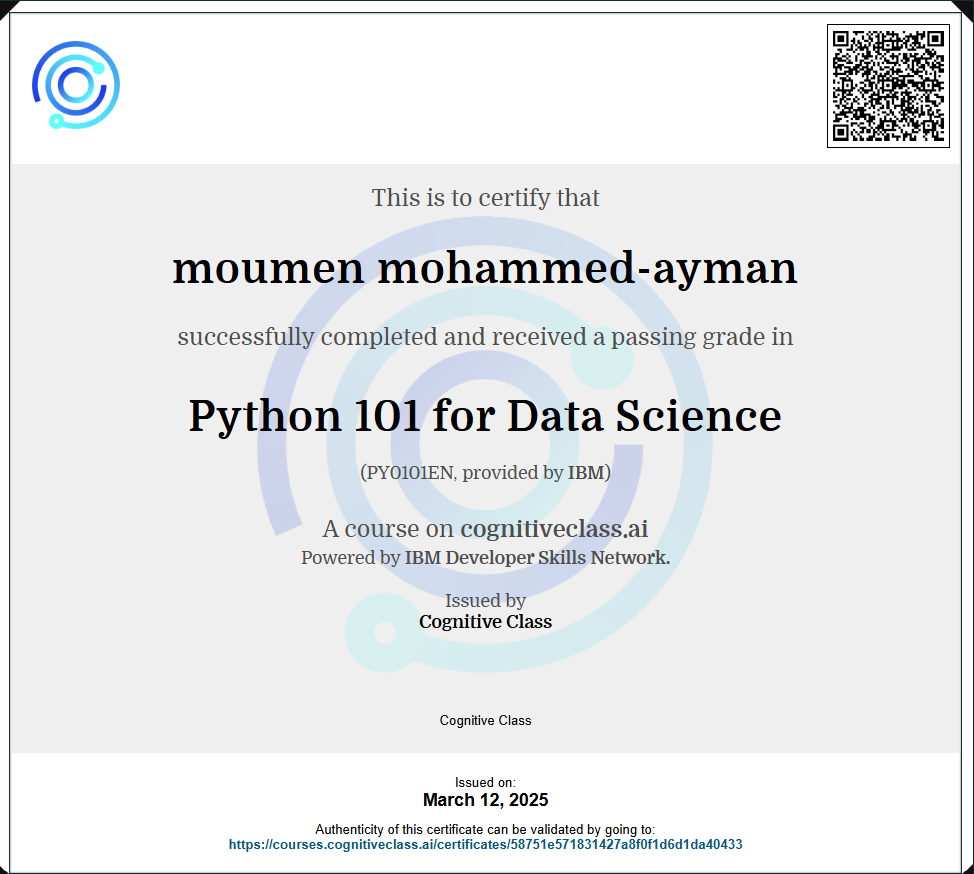